In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/KIIT/Downloads/COVID clinical trials.csv")

In [3]:
df.head(n = 5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [4]:
df.shape

(5783, 27)

In [5]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [6]:
df.select_dtypes(include = 'object').columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [7]:
df.select_dtypes(exclude = 'object').columns

Index(['Rank', 'Enrollment'], dtype='object')

In [8]:
#detecting missing data
missing_data = df.isnull().mean() * 100
missing_data

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [9]:
# Visualize data without calculating
def visualize_data(data , caption = '' , ylabel = 'Percentage of Mising Data'):
    # set figure size
    sns.set(rc={'figure.figsize':(15,8.27)})
    # make ticks vertical
    plt.xticks(rotation=90)
    # set title to the image and plot it or the highest 40
    fig = sns.barplot(x = data.keys()[:min(40 ,
    len(data))].tolist() , y = data.values[: min(40 ,
    len(data))].tolist()) \
    .set_title(caption)
    # set labels
    plt.ylabel(ylabel)
    plt.show()

C:\Users\KIIT\Downloads\annac1\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


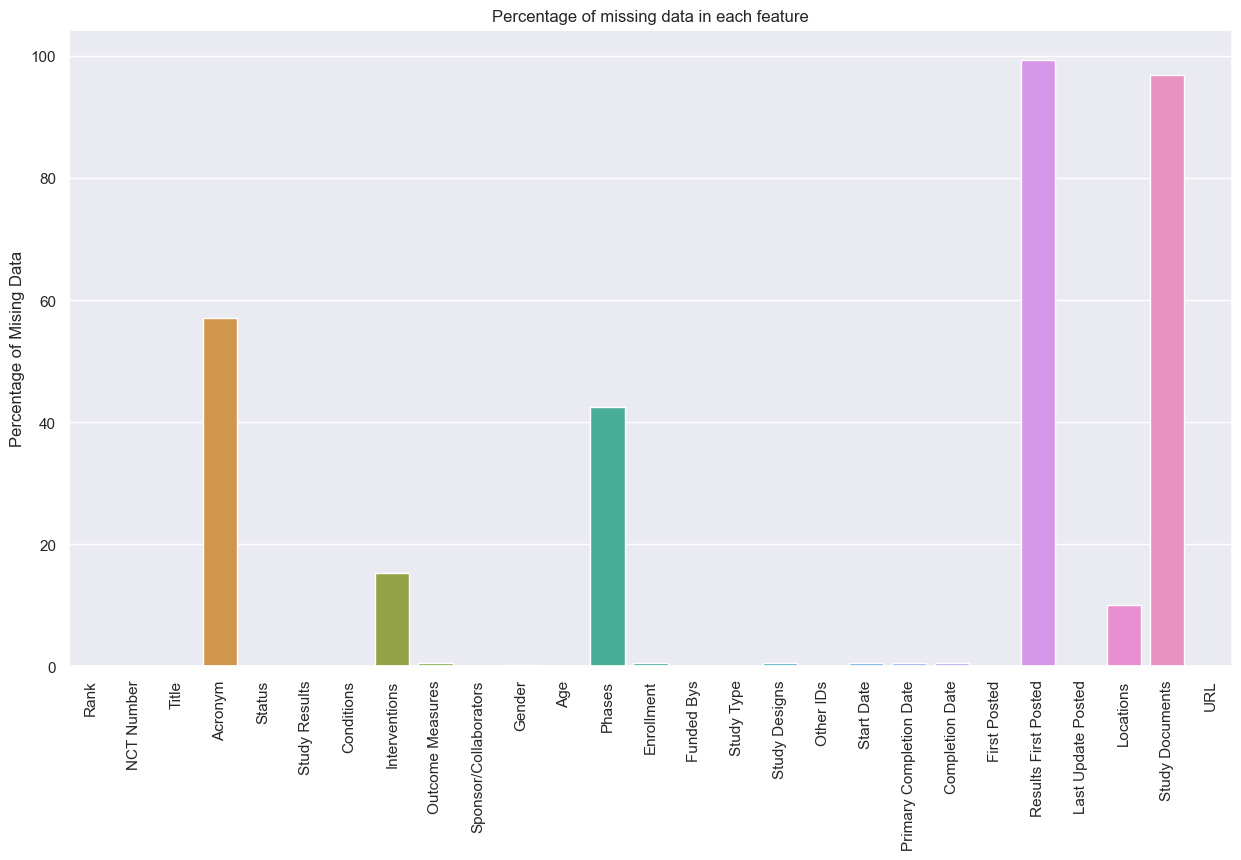

In [10]:
visualize_data(missing_data , 'Percentage of missing data in each feature')

In [11]:
# Drop Study Documents and Results First Posted
df.drop(['Results First Posted' , 'Study Documents'] , inplace = True , axis = 1 )

In [12]:
# Columns in the dataset after dropping Study Documents and Results First Posted
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [13]:
# Drop Duplicate Rows
print(f"Shape before dropping duplicates data {df.shape}")
df.drop_duplicates(inplace = True)
print(f"Shape after dropping duplicates data {df.shape}")

Shape before dropping duplicates data (5783, 25)
Shape after dropping duplicates data (5783, 25)


In [14]:
# Drop rows that have less than 10 non-null values
print(f"Shape before dropping Null rows {df.shape}")
df.dropna(axis=0, thresh=10, inplace=True)
print(f"Shape after dropping Null rows {df.shape}")


Shape before dropping Null rows (5783, 25)
Shape after dropping Null rows (5783, 25)


In [15]:
df.isnull().mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
dtype: float64

In [16]:
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country'] = countries

In [17]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [18]:
df.Country.value_counts()

Country
 United States     1267
 France             647
nan                 585
 United Kingdom     306
 Italy              235
                   ... 
 Oman                 1
 Kyrgyzstan           1
 Mali                 1
 Azerbaijan           1
 Barbados             1
Name: count, Length: 120, dtype: int64

In [19]:
print(f"Number of unique values is {df.Acronym.nunique()} \n")
df.Acronym.value_counts()

Number of unique values is 2338 



Acronym
COVID-19        47
PROTECT          7
CORONA           6
RECOVER          5
SCOPE            5
                ..
ASD              1
VICO             1
LICORNE          1
LOSVID           1
MindMyMindFU     1
Name: count, Length: 2338, dtype: int64

In [20]:
(df.Acronym.isnull().groupby(df.Country).mean().sort_values(ascending = False) * 100)

Country
 Iraq             100.0
 Belarus          100.0
 Rwanda           100.0
 South Sudan      100.0
 Cambodia         100.0
                  ...  
 San Marino         0.0
 Réunion            0.0
 Nigeria            0.0
 Côte D'Ivoire      0.0
 Albania            0.0
Name: Acronym, Length: 120, dtype: float64

In [21]:
# impute by a missing Indicator
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [22]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
Country                     0.000000
dtype: float64

In [23]:
# Impute Interventions , Phases , Locations by Missing Category
categorical_features = df.select_dtypes(include = object).columns
features = categorical_features[df[categorical_features].isnull().mean() > 0]
for feature in features:
    df[feature] = df[feature].fillna(f"Missing {feature}")

In [24]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

Rank                       0.00000
NCT Number                 0.00000
Title                      0.00000
Acronym                    0.00000
Status                     0.00000
Study Results              0.00000
Conditions                 0.00000
Interventions              0.00000
Outcome Measures           0.00000
Sponsor/Collaborators      0.00000
Gender                     0.00000
Age                        0.00000
Phases                     0.00000
Enrollment                 0.58793
Funded Bys                 0.00000
Study Type                 0.00000
Study Designs              0.00000
Other IDs                  0.00000
Start Date                 0.00000
Primary Completion Date    0.00000
Completion Date            0.00000
First Posted               0.00000
Last Update Posted         0.00000
Locations                  0.00000
URL                        0.00000
Country                    0.00000
dtype: float64

In [25]:
# Check the skewness
df.Enrollment.skew()

34.06593382031148

<Axes: ylabel='Density'>

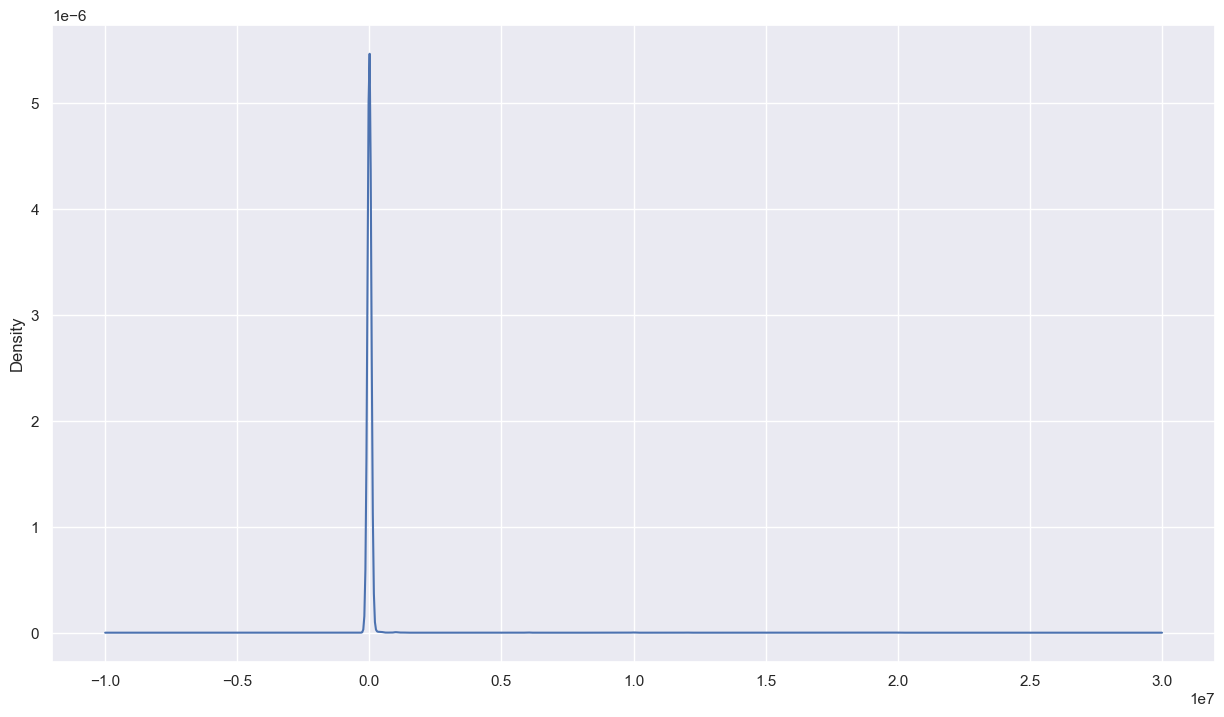

In [26]:
# Plotting the distribution of the enrollment
df.Enrollment.plot(kind = 'kde')

In [27]:
# Some Statstical Valuse for the Enrollment Column
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()

In [28]:
print(f"the min value is {min_Value} \n \
The max value is {max_Value} \n \
The mean is {mean_Value} \n \
The Median is {median_Value} \n \
Standard Devation is {std_Value}")

the min value is 0.0 
 The max value is 20000000.0 
 The mean is 18319.48860671421 
 The Median is 170.0 
 Standard Devation is 404543.7287841073


In [29]:
# Using Median to impute Missing Values
df.Enrollment = df.Enrollment.fillna(median_Value)

In [30]:
# Detecting (Percentage) Missing Data
df.isnull().mean() * 100

Rank                       0.0
NCT Number                 0.0
Title                      0.0
Acronym                    0.0
Status                     0.0
Study Results              0.0
Conditions                 0.0
Interventions              0.0
Outcome Measures           0.0
Sponsor/Collaborators      0.0
Gender                     0.0
Age                        0.0
Phases                     0.0
Enrollment                 0.0
Funded Bys                 0.0
Study Type                 0.0
Study Designs              0.0
Other IDs                  0.0
Start Date                 0.0
Primary Completion Date    0.0
Completion Date            0.0
First Posted               0.0
Last Update Posted         0.0
Locations                  0.0
URL                        0.0
Country                    0.0
dtype: float64

In [31]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL,Country
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,France
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,Colombia
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,San Marino
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,Hong Kong
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,France


C:\Users\KIIT\Downloads\annac1\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


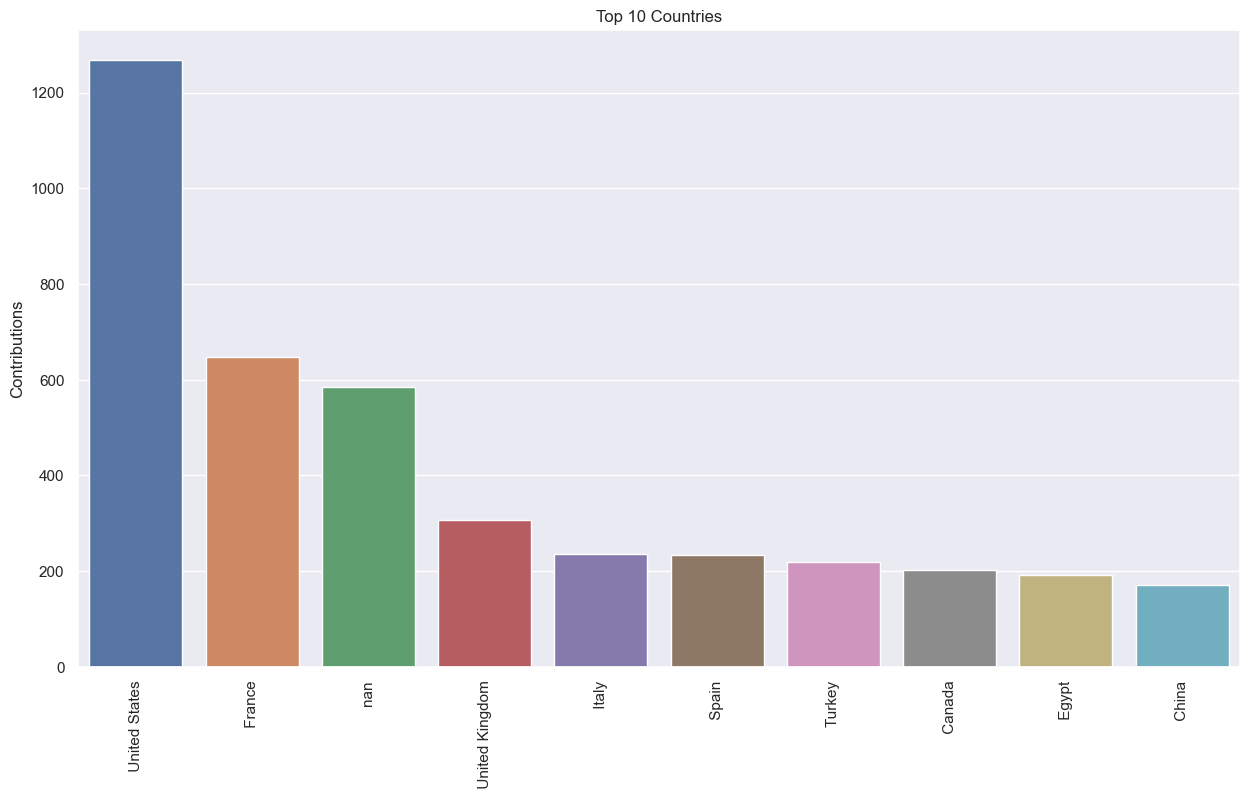

In [32]:
top_10_Countires = df.Country.value_counts()[:10]
visualize_data(top_10_Countires , caption = 'Top 10 Countries', ylabel = 'Contributions')

C:\Users\KIIT\Downloads\annac1\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


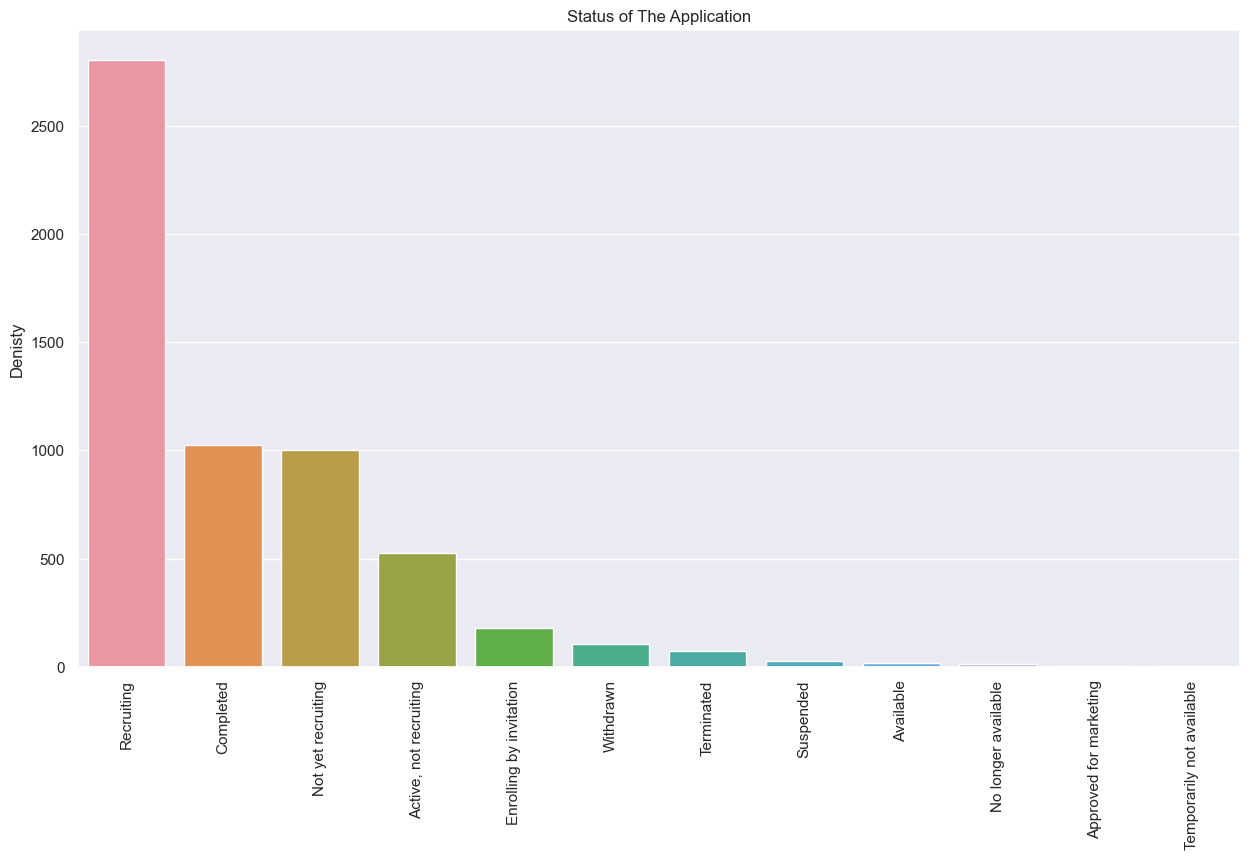

In [33]:
# Status of the Application
status = df.Status.value_counts()
visualize_data(status , caption = 'Status of The Application' , ylabel = 'Denisty')

C:\Users\KIIT\Downloads\annac1\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


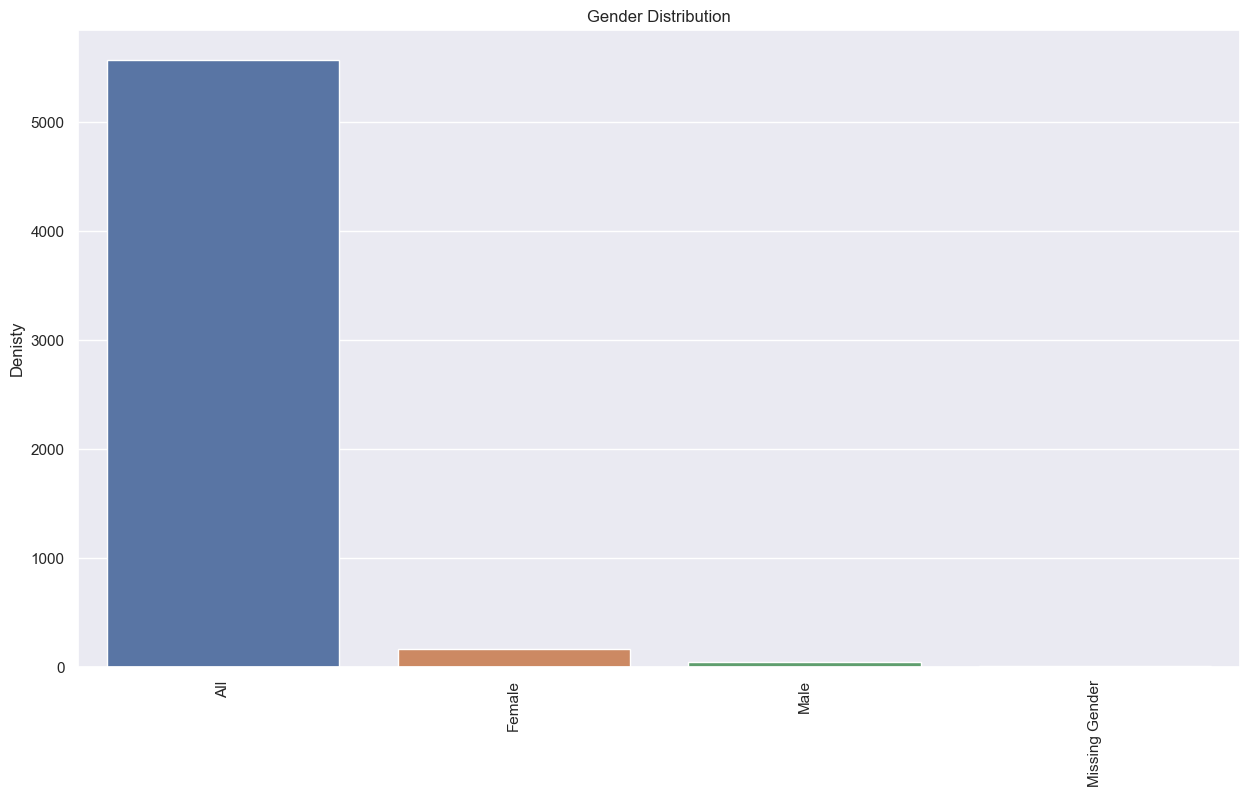

In [34]:
# Gender Visualiztions
gender = df.Gender.value_counts()
visualize_data(gender , caption = 'Gender Distribution' , ylabel = 'Denisty')

C:\Users\KIIT\Downloads\annac1\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


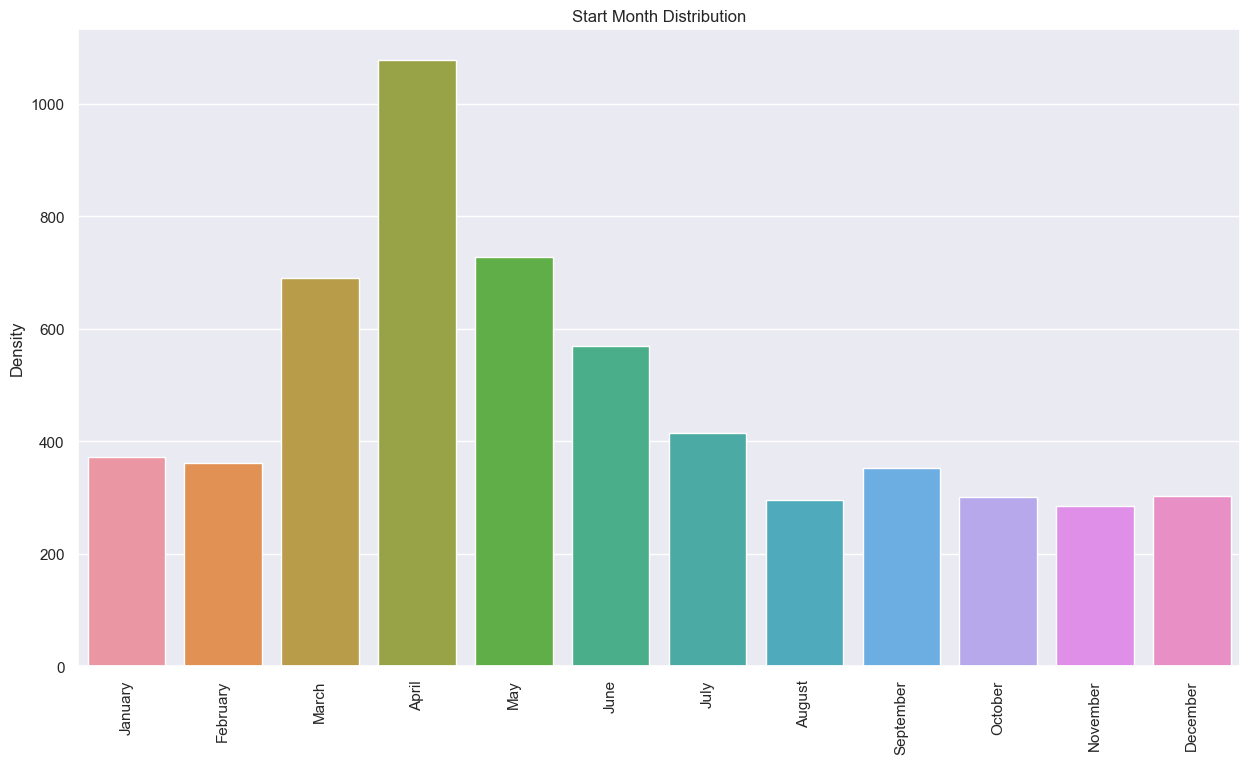

In [35]:
import calendar

# Convert 'Start Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], format='mixed', errors='coerce')
df = df.dropna(subset=['Start Date'])

# Extract month names
start_month = df['Start Date'].dt.month
start_month_named = start_month.map(lambda x: calendar.month_name[x])

# Create distribution with proper month order
start_month_Distribution = start_month_named.value_counts().reindex(calendar.month_name[1:], fill_value=0)

# Now visualize using month names
visualize_data(start_month_Distribution, caption='Start Month Distribution', ylabel='Density')


In [36]:
print(f"The shape of data frame is {df.shape}")
print(f"Nunique in NCT Number is {df['NCT Number'].nunique()}")
print(f"Nunique in URL is {df.URL.nunique()}")

The shape of data frame is (5749, 26)
Nunique in NCT Number is 5749
Nunique in URL is 5749
